In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [10]:
df=pd.read_csv("Mall.csv")

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [20]:
c=["CustomerID","Gender"]
df.drop(columns=c,axis=1,inplace=True)

In [27]:
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


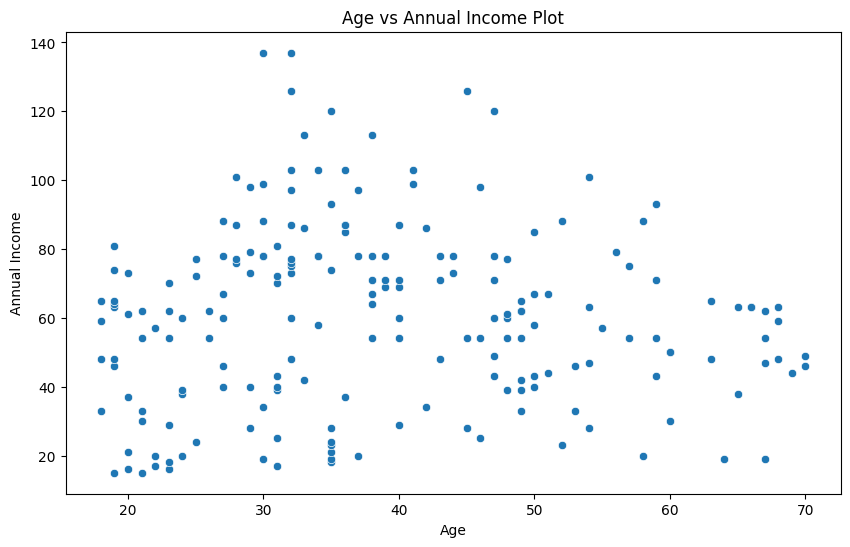

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age vs Annual Income Plot")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

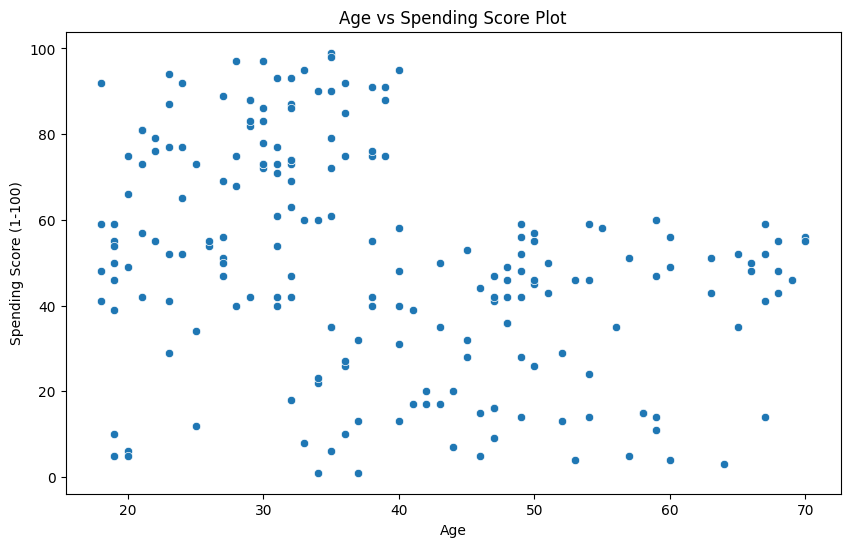

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age vs Spending Score Plot")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

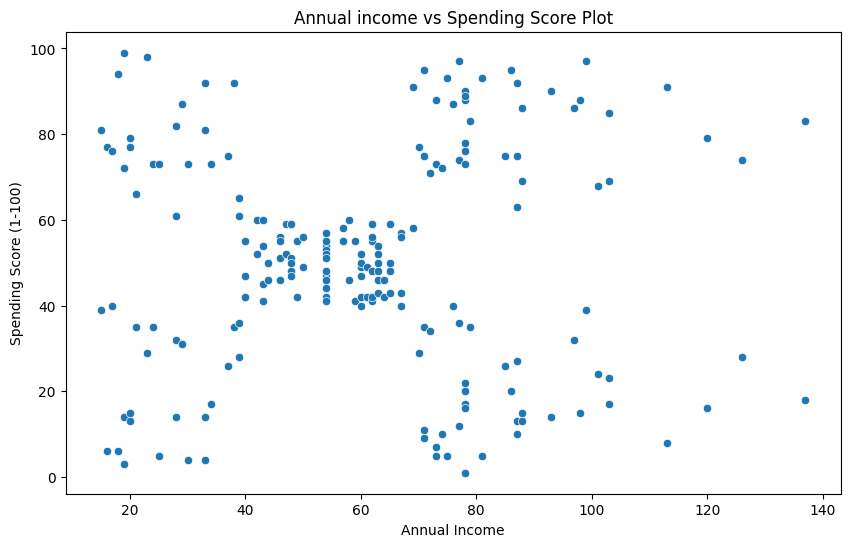

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual income vs Spending Score Plot")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [29]:
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [35]:
print("Skew of age column : ",df['Age'].skew())
print("Skew of annual income column : ",df['Annual Income (k$)'].skew())
print("Skew of spending score column : ",df['Spending Score (1-100)'].skew())

Skew of age column :  0.48556885096681657
Skew of annual income column :  0.3218425498619055
Skew of spending score column :  -0.047220201374263374


In [37]:
c=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in c:
    if df[i].skew()<0:
        print(i," is Left Skewed")
    else:
        print(i," is Right skewed")

Age  is Right skewed
Annual Income (k$)  is Right skewed
Spending Score (1-100)  is Left Skewed


In [41]:
s=StandardScaler()
data=s.fit_transform(df)
df1=pd.DataFrame(data,columns=df.columns)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [43]:
model=KMeans(n_clusters=5,random_state=42)
model.fit(df1)
df1["Cluster"]=model.labels_
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


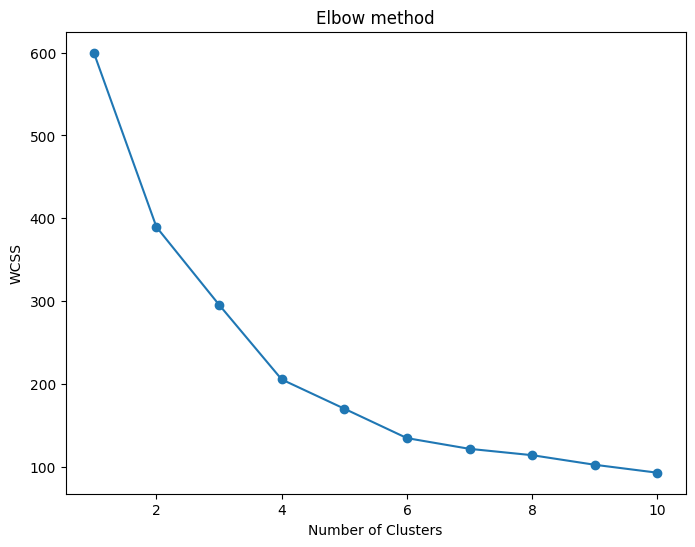

In [44]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(df1.drop("Cluster",axis=1))
    wcss.append(model.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

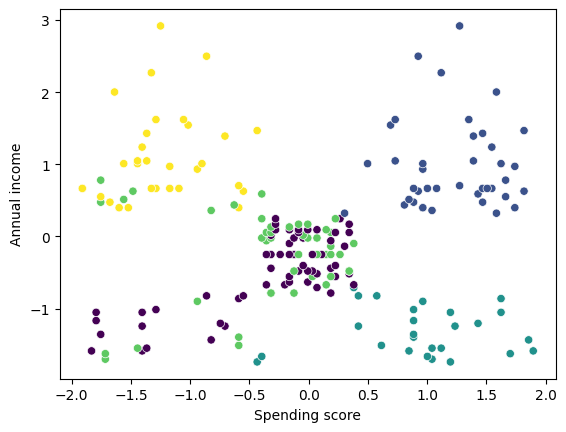

In [46]:
sns.scatterplot(x=df1["Spending Score (1-100)"],y=df1["Annual Income (k$)"],c=df1["Cluster"])
plt.xlabel("Spending score")
plt.ylabel("Annual income")
plt.show()

In [47]:
df1.to_csv("clusteres_mall.csv")

In [66]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import joblib

In [49]:
df2=pd.read_csv("clusteres_mall.csv")

In [50]:
df2.head()

,Unnamed: 0,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,-1.424569,-1.738999,-0.434801,2
1,1,-1.281035,-1.738999,1.195704,2
2,2,-1.352802,-1.700830,-1.715913,3
3,3,-1.137502,-1.700830,1.040418,2
4,4,-0.563369,-1.662660,-0.395980,2


In [69]:
x=df2.drop("Cluster",axis=1)
y=df2["Cluster"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
joblib.dump(model,"model.pkl")
y_pred=d.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.9333333333333333


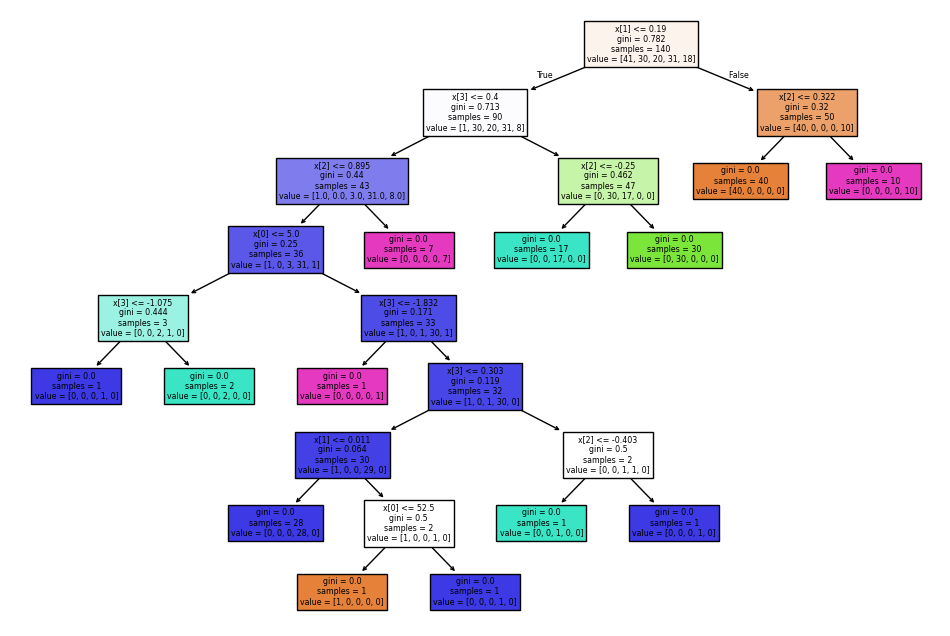

In [68]:
plt.figure(figsize=(12,8))
plot_tree(d,filled=True)
plt.show()